## Exploring the Neptune Light Curve Data

In [1]:
from PyAstronomy.pyTiming import pyPeriod
from AROMA import *
from AROMA.utils import *
from AROMA.config import *
import pandas as pd

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir

data_path = '~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/NeptuneKeplerLightcurve.csv'
dataRaw = pd.read_csv(data_path, delimiter=',', names=['time', 'flux'])
plotPath = join(homedir, 'plots')
data = dataRaw.copy() # full light curve

time, flux = data.time*24, data.flux

# timeroll, fluxroll = data.time[::2], data.flux[::2]
time, flux = data.time[::4], data.flux[::4]

import numpy.random as random
from astropy import units as u
import matplotlib.patches as patches
def: find_nearest(array, value)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)
def: powerfuncsingle(hpp,amp1,shift1)
data_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data
data_path :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37.txt
plot_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots


In [2]:
### Read the power spectra
powerPath = '/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/KeplerNeptunePowerSpectra.txt'
powerspectra = pd.read_csv(powerPath, delimiter='\s+', names=['period', 'power'], skiprows=6)

In [69]:
powerspectra

,period,power
0,1176.485600,2.236600
1,1168.319700,2.204627
2,1160.266300,2.171969
3,1152.323300,2.138672
4,1144.488200,2.104780
...,...,...
5134517,0.032782,0.000019
5134518,0.032782,0.000018
5134519,0.032782,0.000017
5134520,0.032782,0.000016


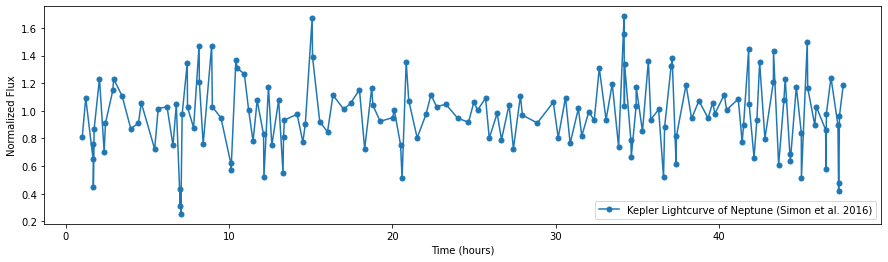

In [3]:
plt.close(), plt.figure(figsize=(15,4))

# plt.plot(timeroll, fluxroll, ls='-', ms=5, c='tab:red', label='Kepler Lightcurve of Neptune (Simon et al. 2016)')
plt.plot(time, flux, ls='-', marker='o', ms=5, c='tab:blue', label='Kepler Lightcurve of Neptune (Simon et al. 2016)')
plt.xlabel('Time (hours)'), plt.ylabel('Normalized Flux')
plt.legend()

In [4]:
powerspectra.query('period>13 & period<21')

,period,power
7873,20.998182,324.09798
7874,20.995563,331.86079
7875,20.992944,339.64361
7876,20.990326,347.44061
7877,20.987709,355.24590
...,...,...
12800,13.004868,165.17564
12801,13.003863,163.76580
12802,13.002859,162.31623
12803,13.001855,160.82800


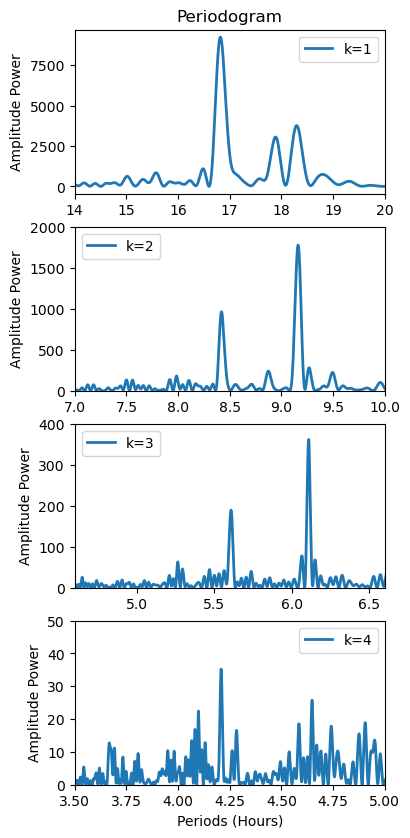

In [5]:
# %matplotlib widget
%matplotlib inline

plt.close('all')

fig, (f0, f1, f2, f3) = plt.subplots(4, 1, figsize=(4,10), dpi=100)
f0.set_title('Periodogram')

p0 = powerspectra.query('period>=4.3 & period<=21')
f0.plot(powerspectra.period, powerspectra.power, ls='-', linewidth=2, alpha=1.0, label='k=1')
f0.set_ylabel('Amplitude Power'), # plt.xlabel('Periods (Hours)')
f0.set_xlim((14,20)), f0.legend()
p1 = powerspectra.query('period>=14 & period<=20')

f1.plot(powerspectra.period, powerspectra.power, ls='-', linewidth=2, alpha=1.0, label='k=2')
f1.set_ylabel('Amplitude Power'), # plt.xlabel('Periods (Hours)')
# plt.title('Periodogram')
f1.set_xlim((7,10)), f1.set_ylim((0,2000)), f1.legend()
p2 = powerspectra.query('period>=7 & period<=10')

f2.plot(powerspectra.period, powerspectra.power, ls='-', linewidth=2, alpha=1.0, label='k=3')
f2.set_ylabel('Amplitude Power'), f2.legend()
f2.set_xlim((4.6, 6.6)), f2.set_ylim((0,400))
p3 = powerspectra.query('period>=4.9 & period<=6.6')

f3.plot(powerspectra.period, powerspectra.power, ls='-', linewidth=2, alpha=1.0, label='k=4')
f3.set_ylabel('Amplitude Power'), f3.set_xlabel('Periods (Hours)'), f3.legend()
# plt.title('Periodogram')
f3.set_xlim((3.5, 5.0)), f3.set_ylim((0,50)), f3.set_xlabel('Periods (Hours)')
p3 = powerspectra.query('period>=3.5 & period<=5.0')

plt.show()

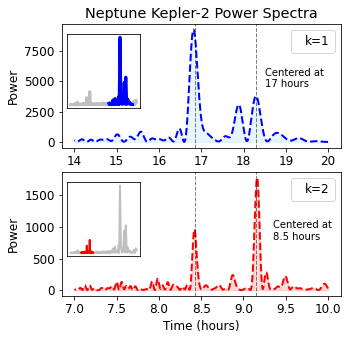

In [7]:
save = True
# save = False
matplotlib.rcParams.update({'font.size': 12})
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
headersize = 12

# Plotting
plt.close()
# k3=True
k3=False

if k3:
    fig, (a0, a1, a2) = plt.subplots(3, 1, figsize=(7,9))
else:
    fig, (a0, a1) = plt.subplots(2, 1, figsize=(5,5))

a0.plot(p1.period, p1.power, '--', linewidth=2,color='blue', label='k=1')
a0.fill_between(p1.period, p1.power, interpolate=True, color='xkcd:light blue',alpha=0.2)

a1.plot(p2.period, p2.power, '--', linewidth=2,color='red', label='k=2')
a1.fill_between(p2.period, p2.power, interpolate=True, color='xkcd:light red',alpha=0.2)

if k3:
    a2.plot(p3.period, p3.power, '--', linewidth=1.5,color='tab:orange', label='k=3')
    a2.fill_between(p3.period, p3.power, interpolate=True, color='xkcd:light orange',alpha=0.2)

a3 = plt.axes([0,0,1,1])
ip = InsetPosition(a0, [0.02,0.32,0.26,0.6])
a3.set_axes_locator(ip)
a3.set_xticks([])
a3.set_yticks([])
a3.plot(p0.period, p0.power, '-', linewidth=3,color='gray', alpha=0.5)
a3.plot(p1.period, p1.power, '-', linewidth=3,color='blue')
# a3.text(4, 0.05, 'k=1', c='b')
# a3.text(3, 0.02, 'data', c='gray')

a4 = plt.axes([0,0,1,1])
ip = InsetPosition(a1, [0.02,0.32,0.26,0.6])
a4.set_axes_locator(ip)
a4.set_xticks([])
a4.set_yticks([])
a4.plot(p0.period, p0.power, '-', linewidth=2,color='gray', alpha=0.5)
a4.plot(p2.period, p2.power, '-', linewidth=2,color='red')
# a4.text(2.3, 0.05, 'k=2', c='r')
# a4.text(3, 0.02, 'data', c='gray')

if k3:
    a5 = plt.axes([0,0,1,1])
    ip = InsetPosition(a2, [0.02,0.32,0.26,0.6])
    a5.set_axes_locator(ip)
    a5.set_xticks([])
    a5.set_yticks([])
    a5.plot(p0.period, p0.power, '-', linewidth=2,color='gray', alpha=0.5)
    a5.plot(p3.period, p3.power, '-', linewidth=2,color='tab:orange')
    # a5.text(2.3, 0.05, 'k=2', c='r')
    # a5.text(3, 0.02, 'data', c='gray')

a0.legend(prop={'size': headersize}, handlelength=0.0, loc='upper right')
a1.legend(prop={'size': headersize}, handlelength=0.0, loc='upper right')
if k3:
    a2.legend(prop={'size': headersize}, handlelength=0.0, loc='upper right')
# plt.xlim(xlim)
# plt.ylim(ylim)

a0.set_title('Neptune Kepler-2 Power Spectra')
a0.set_ylabel('Power')
a1.set_ylabel('Power')

# Annotation
a0.axvline(x=16.85, ymin=0, ymax=10000, ls='--', c='k', alpha=0.5, lw=1)
a1.axvline(x=16.85/2, ymin=0, ymax=10000, ls='--', c='k', alpha=0.5, lw=1)

a0.text(18.5, 4500, 'Centered at\n17 hours', fontsize=10)
a1.text(9.35, 800, 'Centered at\n8.5 hours', fontsize=10)

a0.axvline(x=18.3, ymin=0, ymax=10000, ls='--', c='k', alpha=0.5, lw=1)
a1.axvline(x=18.3/2, ymin=0, ymax=10000, ls='--', c='k', alpha=0.5, lw=1)

if k3:
    a2.set_ylabel('Power')
    a2.set_xlabel('Time (hours)')
else:
    a1.set_xlabel('Time (hours)')

if save: 
    plotOut = plotPath + '/NeptunePowerSpectra_k1-Andk2'
    plt.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    plt.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')